# Import libraries

In [10]:
import pandas as pd
import tensorflow as tf
import cv2 as cv
import os
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [11]:
# goal: separate each image and put its label into its respective folder
# example: shirts would go into a folder called shirts, pants would go into a folder called pants, etc.

# load the csv file
data = pd.read_csv('../data/images/images.csv')
data

# drop all rows where kids=True
data = data[data['kids'] == False]
# drop kids column
data = data.drop(columns=['kids'])

# drop all rows where label is Not Sure
data = data[data['label'] != 'Not sure']

# drop all rows where label is None 
data = data[data['label'] != 'None']

# drop all rows where label is Other
data = data[data['label'] != 'Other']

# drop all rows where label is Skip
data = data[data['label'] != 'Skip']

data




,image,sender_id,label
1,ea7b6656-3f84-4eb3-9099-23e623fc1018,148,T-Shirt
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa,43,T-Shirt
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0,189,Shoes
5,5d3a1404-697f-479f-9090-c1ecd0413d27,138,Shorts
6,b0c03127-9dfb-4573-8934-1958396937bf,138,Shirt
...,...,...,...
5396,9bdac063-6c07-4bfc-a04a-e45224c503df,204,Undershirt
5398,dfd4079d-967b-4b3e-8574-fbac11b58103,204,Shorts
5400,5379356a-40ee-4890-b416-2336a7d84061,310,Shorts
5401,65507fb8-3456-4c15-b53e-d1b03bf71a59,204,Shoes


In [4]:
# create a directory for each label
labels = data['label'].unique()
for label in labels:
    os.makedirs(f'../data/clothes/{label}', exist_ok=True)

# iterate through each row in the csv file
for index, row in data.iterrows():
    # get the image and label
    image = row['image']
    label = row['label']

    # write the image to the respective folder
    with open(f'../data/clothes/{label}/{image}.jpg', 'wb') as f:
        # get the image data from images_original/image.jpg
        image_data = tf.io.read_file(f'../data/images/images_original/{image}.jpg')
        f.write(image_data.numpy())
    
    print(f'Wrote {image}.jpg to ../data/clothes/{label}')

print('Done')

Wrote ea7b6656-3f84-4eb3-9099-23e623fc1018.jpg to ../data/clothes/T-Shirt
Wrote ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa.jpg to ../data/clothes/T-Shirt
Wrote 3b86d877-2b9e-4c8b-a6a2-1d87513309d0.jpg to ../data/clothes/Shoes
Wrote 5d3a1404-697f-479f-9090-c1ecd0413d27.jpg to ../data/clothes/Shorts
Wrote b0c03127-9dfb-4573-8934-1958396937bf.jpg to ../data/clothes/Shirt
Wrote 4c8f245e-a039-46fd-a6b9-1bb51e83fc05.jpg to ../data/clothes/T-Shirt
Wrote c995c900-693d-4dd6-8995-43f3051ec488.jpg to ../data/clothes/Pants
Wrote bf78527f-0734-44fd-a968-f6c32c12d61e.jpg to ../data/clothes/Shoes
Wrote 70045b01-b350-4918-be74-2f627290ad7a.jpg to ../data/clothes/Skirt
Wrote 61bbb3a2-2ee0-47bd-b3f9-2675b3076302.jpg to ../data/clothes/Shoes
Wrote 08215318-faff-4037-bee9-5bceb0af7747.jpg to ../data/clothes/Shoes
Wrote 95609fcf-b2c2-4f35-8454-a308262e30ea.jpg to ../data/clothes/T-Shirt
Wrote 04b42565-23ce-47d9-8f11-e3f1fb0d5051.jpg to ../data/clothes/Top
Wrote 5dcffea5-5111-4397-b9ed-313b41bdeea8.jpg to ../data

In [12]:
clothes_path = os.path.join('../data/clothes')
clothes_path
clothes = tf.keras.utils.image_dataset_from_directory(clothes_path)
clothes

Found 4656 files belonging to 17 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
data_iterator = clothes.as_numpy_iterator()
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x176aa4ec0>)

In [45]:
batch = data_iterator.next()
len(batch)

2

In [16]:
batch

(array([[[[119.00391 , 109.00391 ,  84.00391 ],
          [117.82031 , 107.82031 ,  82.82031 ],
          [120.05078 , 110.05078 ,  85.05078 ],
          ...,
          [132.70703 , 122.70703 ,  97.70703 ],
          [132.875   , 122.875   ,  97.875   ],
          [130.96484 , 120.96484 ,  95.96484 ]],
 
         [[120.61328 , 110.61328 ,  85.61328 ],
          [118.24609 , 108.24609 ,  83.24609 ],
          [120.91406 , 110.91406 ,  85.91406 ],
          ...,
          [139.3164  , 129.3164  , 104.31641 ],
          [133.54297 , 123.54297 ,  98.54297 ],
          [134.83594 , 124.83594 ,  99.83594 ]],
 
         [[121.05078 , 111.05078 ,  86.05078 ],
          [121.875   , 111.875   ,  86.875   ],
          [122.82031 , 112.82031 ,  87.82031 ],
          ...,
          [134.39453 , 124.39453 ,  99.39453 ],
          [127.58594 , 117.58594 ,  92.58594 ],
          [132.39844 , 122.39844 ,  97.39844 ]],
 
         ...,
 
         [[184.40625 , 178.40625 , 166.40625 ],
          [185.410

In [21]:
batch[1]

array([ 0, 14,  3, 14,  8,  5,  6,  4,  6,  5, 14,  7, 14, 12,  8, 14, 10,
       10, 14, 14,  3,  7,  6, 14,  8, 15,  8,  6,  4, 14,  8,  6],
      dtype=int32)

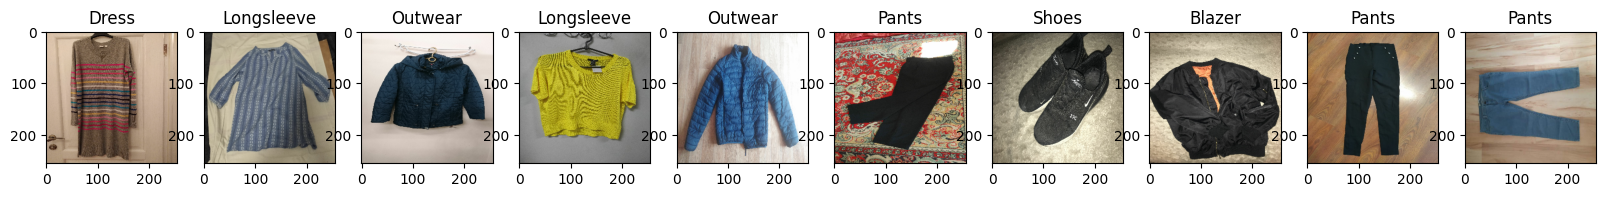

In [49]:
fig, ax = plt.subplots(ncols=10, figsize=(20,20))
# make map to simplify the code a bit


num_to_class
for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(clothes.class_names[batch[1][idx]])


In [47]:
clothes.class_names

['Blazer',
 'Blouse',
 'Body',
 'Dress',
 'Hat',
 'Hoodie',
 'Longsleeve',
 'Outwear',
 'Pants',
 'Polo',
 'Shirt',
 'Shoes',
 'Shorts',
 'Skirt',
 'T-Shirt',
 'Top',
 'Undershirt']